<a href="https://colab.research.google.com/github/lionelrug/Agile-Digital-Project/blob/master/GoldPriceP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
import pandas as pd

gold_data = pd.read_csv('/content/Sep_data_CLE.csv')


In [ ]:
gold_data.head()

,DATE,M2,FED RATES,GOLD,REAL INTEREST,INFLATION,US/EURO
0,01/01/1991,3.82,5.53,392.75,3.72,5.65,1.3772
1,01/02/1991,3.82,7.85,390.80,3.72,5.65,1.3773
2,01/03/1991,3.82,7.18,386.30,3.72,5.65,1.3777
3,01/04/1991,3.82,6.52,387.40,3.72,5.65,1.3675
4,01/07/1991,3.82,6.26,391.10,3.72,5.65,1.3465


In [ ]:
gold_data.tail()

,DATE,M2,FED RATES,GOLD,REAL INTEREST,INFLATION,US/EURO
7994,08/25/2021,13.91,0.08,1709.13,-1.67,5.4,1.1739
7995,08/26/2021,13.91,0.08,1792.16,-1.66,5.4,1.1766
7996,08/27/2021,13.91,0.08,1816.52,-1.74,5.4,1.1750
7997,08/30/2021,13.91,0.08,1809.45,-1.74,5.4,1.1799
7998,08/31/2021,13.91,0.08,1813.42,-1.71,5.4,1.1809


In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           7999 non-null   object 
 1   M2             7999 non-null   float64
 2   FED RATES      7999 non-null   float64
 3   GOLD           7999 non-null   float64
 4   REAL INTEREST  7999 non-null   float64
 5   INFLATION      7999 non-null   float64
 6   US/EURO        7999 non-null   float64
dtypes: float64(6), object(1)
memory usage: 437.6+ KB


In [ ]:
gold_data.isnull().sum()

DATE             0
M2               0
FED RATES        0
GOLD             0
REAL INTEREST    0
INFLATION        0
US/EURO          0
dtype: int64

In [ ]:
gold_data.describe()

,M2,FED RATES,GOLD,REAL INTEREST,INFLATION,US/EURO
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.00000
mean,6.145494,2.562860,813.629084,1.943857,2.296053,1.20304
std,4.044280,2.246249,583.145613,16.803632,1.251666,0.14373
min,0.230000,0.040000,33.700000,-1.910000,-2.100000,0.82730
25%,4.110000,0.170000,353.725000,0.140000,1.610000,1.11580
50%,5.740000,1.960000,579.600000,1.210000,2.300000,1.20770
75%,7.080000,5.010000,1267.350000,2.010000,3.010000,1.30050
max,27.120000,10.390000,13339.000000,321.000000,6.050000,1.59880


Correlation :

1. Positive Correlation

2. Negative Correlation

In [ ]:
gold_data.shape

(7999, 7)

In [ ]:
gold_data.info

<bound method DataFrame.info of             DATE     M2  FED RATES     GOLD  REAL INTEREST  INFLATION  US/EURO
0     01/01/1991   3.82       5.53   392.75           3.72       5.65   1.3772
1     01/02/1991   3.82       7.85   390.80           3.72       5.65   1.3773
2     01/03/1991   3.82       7.18   386.30           3.72       5.65   1.3777
3     01/04/1991   3.82       6.52   387.40           3.72       5.65   1.3675
4     01/07/1991   3.82       6.26   391.10           3.72       5.65   1.3465
...          ...    ...        ...      ...            ...        ...      ...
7994  08/25/2021  13.91       0.08  1709.13          -1.67       5.40   1.1739
7995  08/26/2021  13.91       0.08  1792.16          -1.66       5.40   1.1766
7996  08/27/2021  13.91       0.08  1816.52          -1.74       5.40   1.1750
7997  08/30/2021  13.91       0.08  1809.45          -1.74       5.40   1.1799
7998  08/31/2021  13.91       0.08  1813.42          -1.71       5.40   1.1809

[7999 rows x 7 colu

In [ ]:
correlation = gold_data.corr()

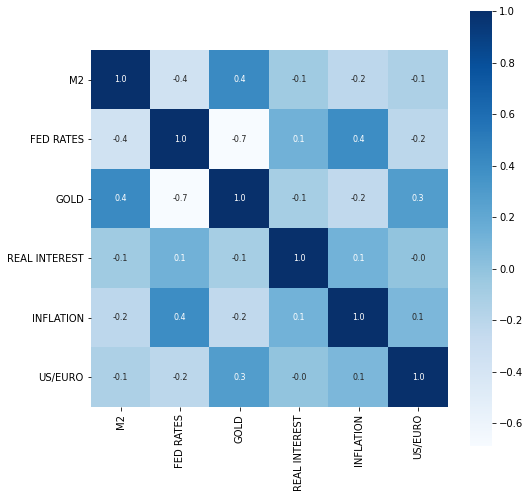

In [ ]:
correlation = gold_data.corr()
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar= True , square= True, fmt='.1f' , annot=True, annot_kws= {'size' :8 }, cmap='Blues') 

In [ ]:
print(correlation['GOLD'])

M2               0.414789
FED RATES       -0.688034
GOLD             1.000000
REAL INTEREST   -0.097429
INFLATION       -0.234047
US/EURO          0.281527
Name: GOLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


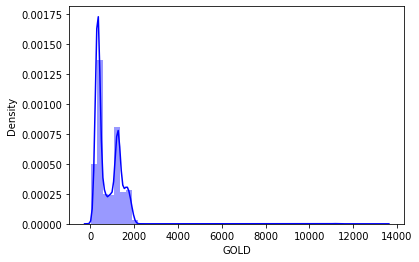

In [ ]:
sns.distplot(gold_data['GOLD'],color='blue' )

In [ ]:
X = gold_data.drop(['DATE', 'GOLD'], axis= 1)
Y = gold_data['GOLD']

In [ ]:
print(X)

         M2  FED RATES  REAL INTEREST  INFLATION  US/EURO
0      3.82       5.53           3.72       5.65   1.3772
1      3.82       7.85           3.72       5.65   1.3773
2      3.82       7.18           3.72       5.65   1.3777
3      3.82       6.52           3.72       5.65   1.3675
4      3.82       6.26           3.72       5.65   1.3465
...     ...        ...            ...        ...      ...
7994  13.91       0.08          -1.67       5.40   1.1739
7995  13.91       0.08          -1.66       5.40   1.1766
7996  13.91       0.08          -1.74       5.40   1.1750
7997  13.91       0.08          -1.74       5.40   1.1799
7998  13.91       0.08          -1.71       5.40   1.1809

[7999 rows x 5 columns]


In [ ]:
print(Y)

0        392.75
1        390.80
2        386.30
3        387.40
4        391.10
         ...   
7994    1709.13
7995    1792.16
7996    1816.52
7997    1809.45
7998    1813.42
Name: GOLD, Length: 7999, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=1000)

regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
test_data_prediction = regressor.predict(X_test)

print(test_data_prediction)

[1235.6438   387.29081 1571.53045 ...  407.6437   256.24735 1296.43875]


In [ ]:
from sklearn import metrics
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared: " ,error_score)

R squared:  0.9767702842898508


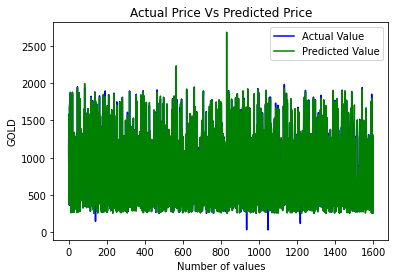

In [ ]:
Y_test = list (Y_test)

plt.plot(Y_test, color='Blue', label ='Actual Value')
plt.plot(test_data_prediction, color='green', label = 'Predicted Value')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GOLD')
plt.legend()
plt.show()